In [2]:
## Importing Required Libraries
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import os

In [3]:
os.chdir(r'../Datasets/')

In [4]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array,load_img

In [5]:
## Data Augmentation
train_datagen=ImageDataGenerator(rescale=1/255.0,zoom_range=0.2,
                                 shear_range=0.3,horizontal_flip=True,
                                 brightness_range=[0.5,1.5])
test_datagen=ImageDataGenerator(rescale=1/255.0)
val_datagen=ImageDataGenerator(rescale=1/255.0)

In [6]:
BATCH_SIZE=32
IMG_SHAPE=(224,224)

In [8]:

train_data=train_datagen.flow_from_directory("maskdata/Train",
                                            target_size=IMG_SHAPE,
                                             batch_size=BATCH_SIZE,class_mode="binary")
test_data=train_datagen.flow_from_directory("maskdata/Test",
                                            target_size=IMG_SHAPE,
                                            batch_size=BATCH_SIZE,class_mode="binary")
val_data=train_datagen.flow_from_directory("maskdata/Validation",
                                            target_size=IMG_SHAPE,
                                           batch_size=BATCH_SIZE,class_mode="binary")

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [9]:
train_data.class_indices

{'Mask': 0, 'Non Mask': 1}

In [10]:
image_class_dict={0:"Mask",1:"Non Mask"}

In [11]:
### Ploting Augmented Images
def plot_random_images():
    images,labels=train_data.next()
    plt.figure(figsize=(20,10))
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.imshow(images[i])
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(image_class_dict[labels[i]])

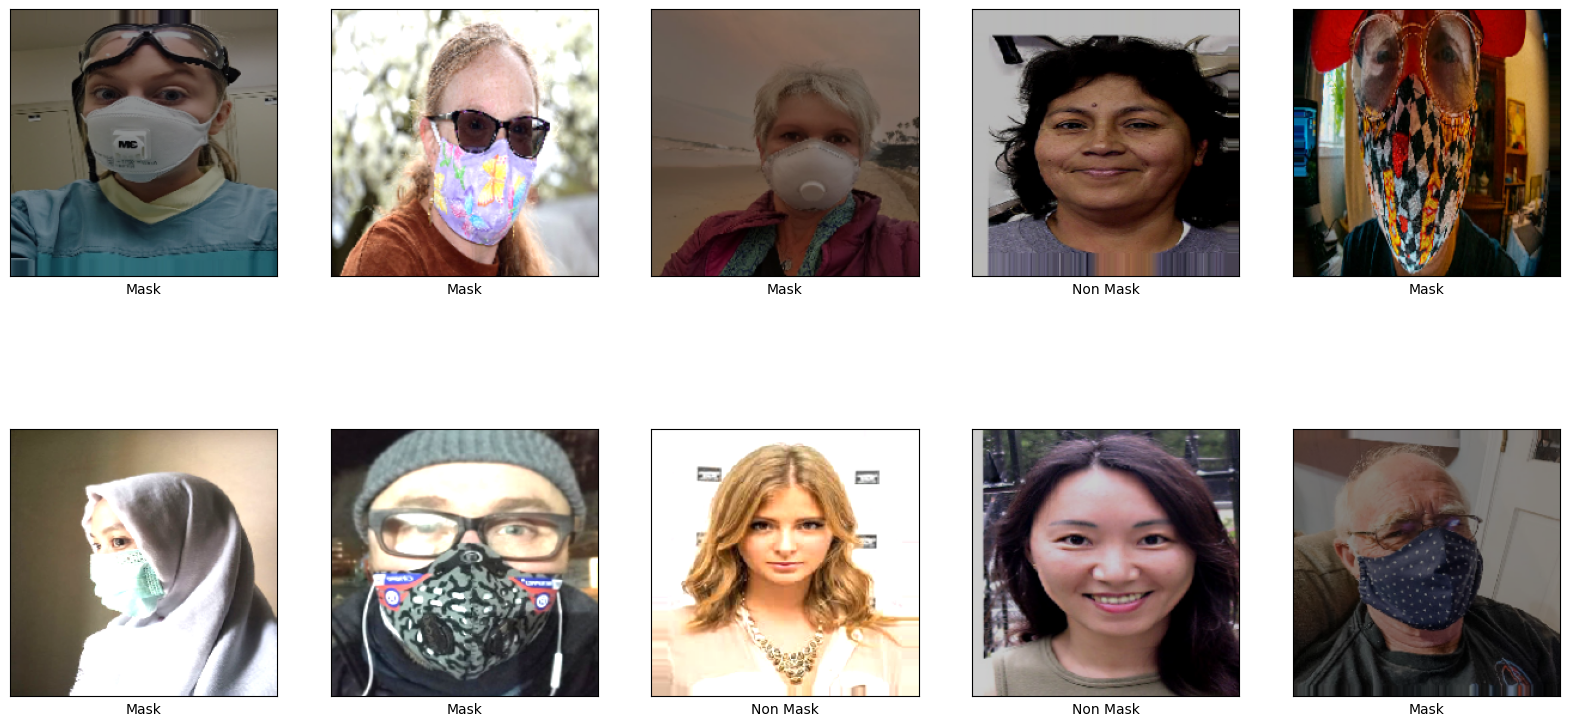

In [12]:
plot_random_images()

### Building Base CNN model

In [13]:
cnn_model=tf.keras.models.Sequential([
    Conv2D(16,3,activation="relu",input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    Conv2D(32,3,activation="relu"),
    MaxPooling2D(2,2),
    Conv2D(64,3,activation="relu"),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(100,activation="relu"),
    Dense(1,activation="sigmoid")
])

In [14]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [15]:
cnn_model.compile(optimizer="adam",loss="binary_crossentropy",metrics="accuracy")

In [16]:
history = cnn_model.fit_generator(train_data,epochs=20,
                                  steps_per_epoch=train_data.samples//BATCH_SIZE,
                                  validation_data=val_data,
                                  validation_steps=val_data.samples//BATCH_SIZE)

Epoch 1/20
18/18 [==============================] - 29s 2s/step - loss: 0.8104 - accuracy: 0.5775 - val_loss: 0.5368 - val_accuracy: 0.6910
Epoch 2/20
18/18 [==============================] - 22s 1s/step - loss: 0.3829 - accuracy: 0.8521 - val_loss: 0.3441 - val_accuracy: 0.8924
Epoch 3/20
18/18 [==============================] - 23s 1s/step - loss: 0.3270 - accuracy: 0.8662 - val_loss: 0.3102 - val_accuracy: 0.8819
Epoch 4/20
18/18 [==============================] - 24s 1s/step - loss: 0.2716 - accuracy: 0.8944 - val_loss: 0.3195 - val_accuracy: 0.8750
Epoch 5/20
18/18 [==============================] - 23s 1s/step - loss: 0.2739 - accuracy: 0.8944 - val_loss: 0.3209 - val_accuracy: 0.8750
Epoch 6/20
18/18 [==============================] - 22s 1s/step - loss: 0.2192 - accuracy: 0.9155 - val_loss: 0.2877 - val_accuracy: 0.8819
Epoch 7/20
18/18 [==============================] - 23s 1s/step - loss: 0.2180 - accuracy: 0.9208 - val_loss: 0.2374 - val_accuracy: 0.9097
Epoch 8/20
18/18 [==

In [17]:
cnn_model.evaluate(test_data)

4/4 [==============================] - 3s 807ms/step - loss: 0.1735 - accuracy: 0.9200


[0.17351272702217102, 0.9200000166893005]

Text(0.5, 0, 'Epochs')

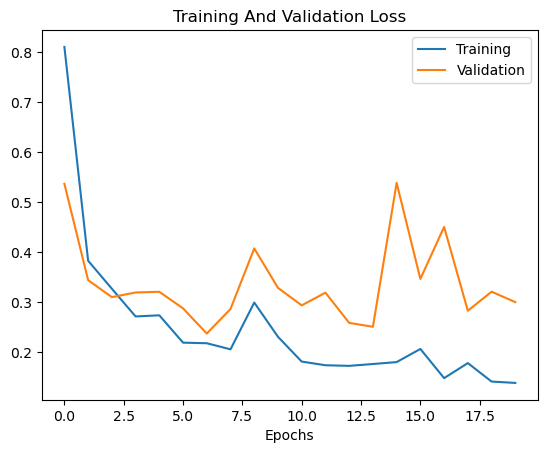

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Validation'])
plt.title("Training And Validation Loss")
plt.xlabel("Epochs")

In [19]:
from tensorflow.keras.preprocessing import image

In [20]:
test_image = image.load_img('maskdata/Test/mask/2070.jpg', target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn_model.predict(test_image)
print(result[0])

1/1 [==============================] - 0s 127ms/step
[0.]


In [21]:
test_image = image.load_img('maskdata/Test/Non Mask/real_01032.jpg', target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn_model.predict(test_image)
print(result[0])

1/1 [==============================] - 0s 22ms/step
[1.]


In [22]:
test_image = image.load_img('maskdata/Test/Non Mask/real_01040.jpg', target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn_model.predict(test_image)
print(result[0])

1/1 [==============================] - 0s 43ms/step
[1.]


In [23]:
tf.keras.models.save_model(cnn_model,'recognize_mask.h5')